## Reminder - working with notebooks

#### 1) It is important to save your work, exit the notebook, and logout of syzygy whenever you are finished working on the notebook for that session. Simply closing the window in which you are working will leave the notebook running which can produce some minor problems when you next try to log in to resume working on the notebook.

- **Select File > Save Notebook or select the Save icon above to save your work.**
- **To exit the notebook, select File > Close and Shutdown Notebook.**
- **Select File > Log Out.**


#### 2) When you resume your work on a notebook, your previous work/output may still be displayed, but none of your previous work is maintained in memory accessible by the notebook. In particular, you will need to load the dataset again in order to continue working with the data. One easy way to refresh your notebook is to go to the notebook cell where you left off and do the following.

- **Select Kernel > Restart Kernel and Run up to Selected Cell.**
#### This will run all of the code in your notebook up to the selected cell.

## Objectives
* checking whether data has approximately normal distribution
    * `hist`
    * `qqnorm`
    * `qqline`
* random sampling from a normal distribution
    * `rnorm` 
* determining percentiles for some value, $x$, from a normal distribution, ie determining $P(X \le x)$ 
    * `pnorm`
* determining cutoff for some percentile, $q$, from a normal distribution, ie determining $x$ such that $P(X \le x) = q$
  * `qnorm`

## Load Data: 

In [1]:
download.file("http://www.openintro.org/stat/data/nc.RData",destfile = "nc.RData")
load("nc.RData")

The `download.file` function and `load` function are used to import the dataset that will be used in the assignment. The data that is available to you is called `nc`. These commands instruct R to access the OpenIntro website and retrieve some data, which is in a file called `nc.RData`. The .RData indicates a file format, like .csv, .txt etc. R is capable of importing files of various formats (using the appropriate command). The `nc` dataset, which is contained within `nc.RData` is already in a format native to R.  

## Data Information:

### Data Set:

#### Name: #### 
* `nc`


#### Variables: ####

The variables included in the dataset are  

* `fage`: Father's age in years.
* `mage`: Mother's age in years.
* `mature`: Maturity status of mother.
* `weeks`: Length of pregnancy in weeks.
* `premie`: Whether the birth was classified as premature (premie) or full-term.
* `visits`: Number of hospital visits during pregnancy.
* `gained`: Weight gained by mother during pregnancy in pounds.
* `weight`: Weight of the baby at birth in pounds.
* `lowbirthweight`: Whether baby was classified as low birthweight (low) or not (not low).
* `gender`: Gender of the baby, female or male.
* `habit`: Status of the mother as a nonsmoker or a smoker.
* `marital`: Whether mother is married or not married at birth.
* `whitemom`: Whether mom is white or not white.


## North Carolina Births

In 2004, the state of North Carolina released to the public a large data set containing information on births recorded in this state. This data set has been of interest to medical researchers who are studying the relation between habits and practices of expectant mothers and the birth of their children. This is a random sample of 1,000 cases from this data set.

---

## Getting Started

Let’s take a quick look at the first few rows of the data.

In [2]:
head(nc)

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,NA,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
2,NA,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
3,19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
4,21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
5,NA,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white
6,NA,15,younger mom,38,full term,19,married,22,5.38,low,male,nonsmoker,not white


We can see that for every observation we have recorded nine variables. Some of these variables are categorical and some are quantitative.

### Exercise: Make a histogram of birthweights, `weight`. How would you describe the distribution of birthweights?

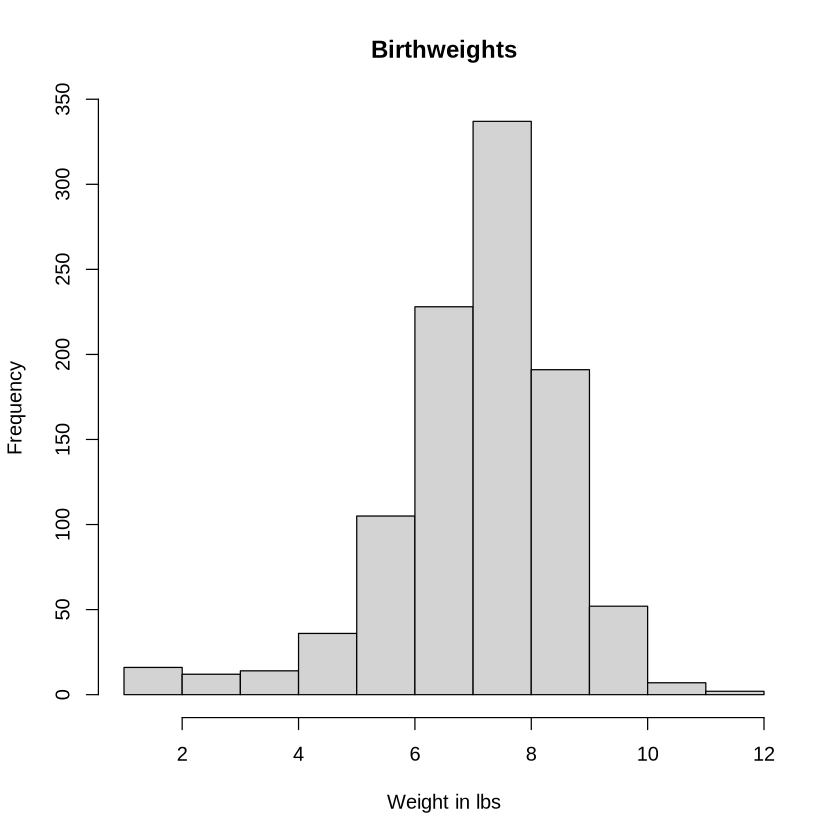

In [3]:
hist(nc$weight, xlab = "Weight in lbs", main = "Birthweights")

### The normal distribution

In your description of the distribution, did you use words like bell-shaped or normal? Did you use words like skewded left?

### Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to "bell-shaped". An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".

#### Normal probability plot (Quantile-Quantile plot) - `qqnorm`

The normal probability plot, or quantile-quantile plot (QQ plot), shows the data on the vertical axis ranked in order from smallest to largest (“sample quantiles” in the figure below). On the horizontal axis, it shows the expected value of an observation with the same quantile if the distribution were normal (“theoretical quantiles” in the same figure). The QQ plot should follow more or less along a straight line if the data come from a normal distribution (with some tolerance for sampling variation).

QQ plots can be made in R using a function called `qqnorm`. Simply give the vector of data as input and it will draw a QQ plot for you. `qqline` will draw a line through that Q-Q plot to make the linear relationship easier to see.)

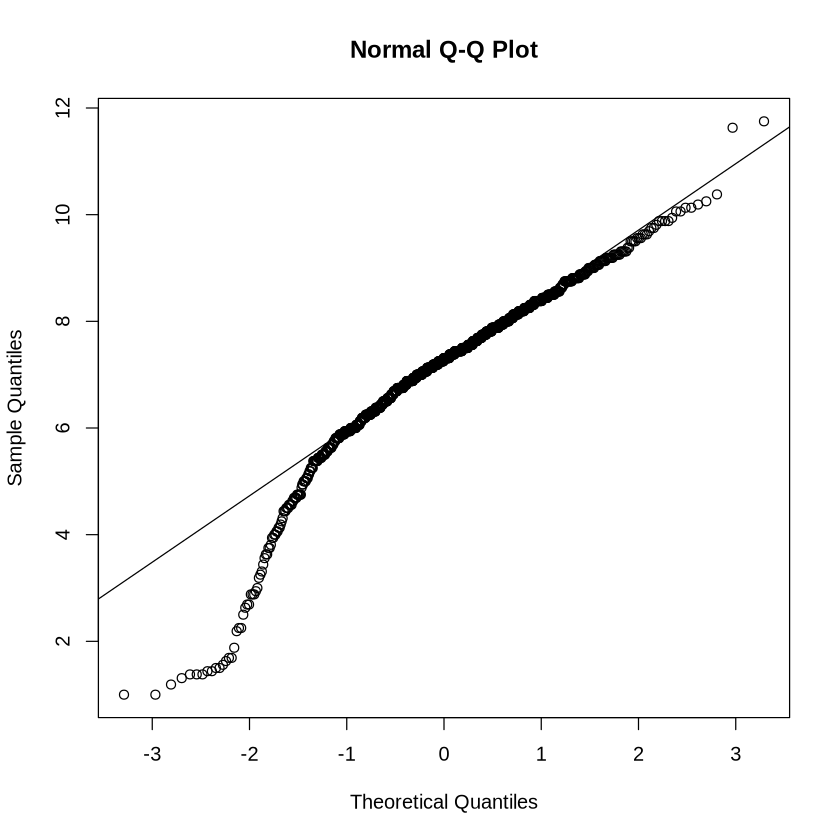

In [4]:
qqnorm(nc$weight)
qqline(nc$weight)

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for birthweights heights shows points that tend to follow the line for larger values, but deviate from the line quite subtantially for smaller values, which are values in the lower tail. This corresponds to the left skewed behaviour that appeared in the distribution. Of course even normal data will not follow the line exactly. There will be some departures from the straight line. We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by simulating data from a normal distribution using `rnorm`.

#### `rnorm`
The function `rnorm` will return a vector of numbers, all drawn randomly from a normal distribution. It takes three arguments:  
`n`: how many random numbers to generate (the length of the output vector)  
`mean`: the mean of the normal distribution to sample from  
`sd`: the standard deviation of the normal distribution

This normal distribution should have the same mean and standard deviation as the data. Let’s calculate mean birthweight and standard deviation of birthweight and save them as a separate objects that may be referenced later.

In [5]:
weight_mean = mean(nc$weight)
weight_mean
weight_sd = sd(nc$weight)
weight_sd

[1] 7.101

[1] 1.50886

The mean birthweight was approximately 7.1 pounds, with a standard deivation of approximately 1.51 pounds.

In [6]:
sim_norm = rnorm(n = length(nc$weight), mean = weight_mean, sd = weight_sd)

The first argument indicates how many numbers you’d like to generate, which we specify to be the same number of weights in the `nc` data set using the `length` function. The last two arguments determine the mean and standard deviation of the normal distribution from which the simulated sample will be generated. We can take a look at the shape of our simulated data set, `sim_norm`, as well as its normal probability plot.

### Exercise: Make a histogram of `sim_norm`, the simulated birthweights. How does this histogram compare to the histogram for the real data?

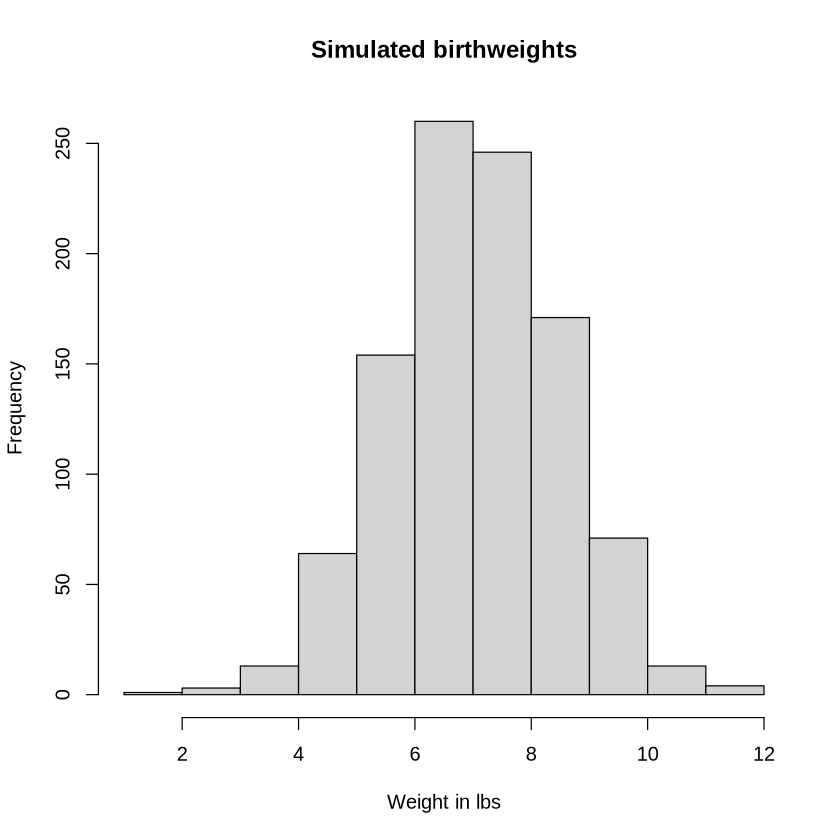

In [7]:
hist(sim_norm, xlab = "Weight in lbs", main = "Simulated birthweights")

### Exercise: Make a normal probability plot of `sim_norm`. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?

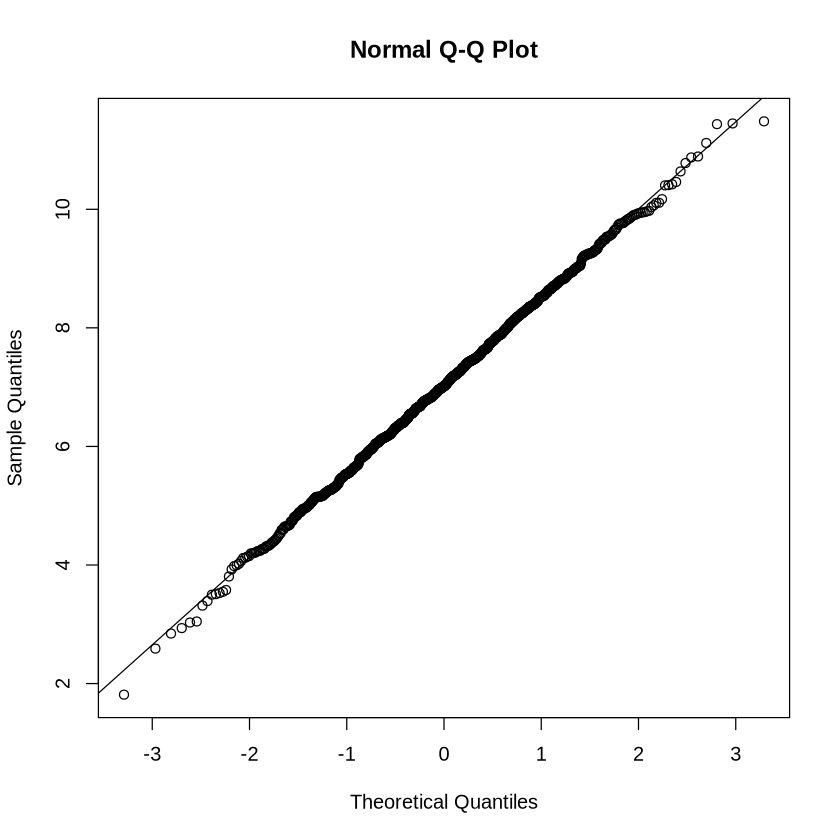

In [8]:
qqnorm(sim_norm)
qqline(sim_norm)

### Normal probabilities

Okay, so now you have some tools to judge whether or not a variable is normally distributed. Why should we care?

It turns out that statisticians know a lot about the normal distribution. Once we decide that a random variable is approximately normal, we can answer all sorts of questions about that variable related to probability. Take, for example, the question of, “What is the probability that a randomly birth has a birthweight less than 5.5 pounds, which is threshold for classification as low birthweight in this dataset.

If we assume that birthweights are normally distributed (a very close approximation is also okay), we can find this probability by calculating a Z score (standardized score) and consulting a Z table (also called a normal probability table). In R, this is done in one step with the function `pnorm`.

#### `pnorm`
The function `pnorm` will calculate $P(X \le q)$, for some value $q$ for a normal distribution with a given mean and standard deviation. The default mean is 0 and default standard deviation is 1, but you can specify any mean and standard deviation you wish. `lower.tail` is an optional argument that determines whether `pnorm` calculates $P(X \le q)$ or $P(X > q)$. The `pnorm` function takes three (or four) arguments:  

`q`: value at which probability is calculated, $P(X \le q)$  
`mean`: the mean of the normal distribution; default mean is 0  
`sd`: the standard deviation of the normal distribution; default standard deviation is 1  
`lower.tail`: optional argument. Default is `lower.tail = TRUE`. If `lower.tail = FALSE`, `pnorm` will calculate $P(X > q)$

Therefore, to calculate the probability that birthweight is less than 5.5 pounds we can use the `pnorm` function with a normal distribution that has the same mean as our mean birthweight, `weight_mean`, and the same standard deviation as the standard deviation of birthweights, `weight_sd`.

In [9]:
pnorm(q = 5.5, mean = weight_mean, sd = weight_sd)

[1] 0.14433

Note that the function `pnorm` gives the area under the normal curve below a given value, `q`, with a given mean and standard deviation. If we are interested in the probability that birthweight is greater than some value, we would have to take one minus that probability, or include the `lower.tail=FALSE` argument with the `pnorm` function.

Assuming a normal distribution has allowed us to calculate a theoretical probability. However, we know that the distribution of birthweights did not seem to follow a normal distribution. If we want to calculate the desired probability empirically, we simply need to determine how many observations fall below 5.5 then divide this number by the total sample size.

In [10]:
sum(nc$weight <= 5.5) / length(nc$weight)

[1] 0.111

Although the probabilities are not too far apart, the difference does reflect the fact that the distribution of birthweights is left skewed instead of normally distributed. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

-----

### Modelling data using the normal distribution

The Graduate Record Examination (GRE) is a standardized test that is an admissions requirement for many graduate schools in the United States and Canada and a few other countries. The GRE includes sections testing Verbal Reasoning and another testing Quantitative Reasoning. Suppose that the distribution of scores on the Verbal Reaoning section are approximately normal with a mean score of 151 and a standard deviation of 7. Futhermore, suppose that the distribution of scores on the Quantitative Reaoning section are approximately normal with a mean score of 153 and a standard deviation of 7.67.

If $X$ represents the score on the Verbal Reasoning section, then we are assuming $$X \sim N(\mu=151, \sigma = 7)$$.

If $Y$ represents the score on the Quantitative Reasoning section, then we are assuming $$Y \sim N(\mu=153, \sigma = 7.67)$$.

### Exercise: Suppose Sophia who took the Graduate Record Examination (GRE) scored 160 on the Verbal Reasoning section and 157 on the Quantitative Reasoning section. Relative to other test takers, which section did she do better on?

#### Answer: <br> There are two common approaches to this problem. <br><br>(i) Z-Scores: One option is to compare Sophia's standardized score (Z-score) on each section. This measures the distance of a value from the mean in terms of standard deviations. These standardized values allows us to compare across different distribution. <br><br> For Verbal Reasoning, $X=160$ and $$Z = \frac{x-\mu}{\sigma} = \frac{160-151}{7}=1.29$$

In [11]:
(160-151)/7

[1] 1.285714

#### For Quantitative Reasoning, $Y=157$ and $$Z = \frac{y-\mu}{\sigma} = \frac{157-153}{7.67}=0.52$$

In [12]:
(157-153)/7.67

[1] 0.5215124

#### Sophia's Verbal Reasoning score was 1.29 standard deviations above the mean. Sophia's Quantitative Reasoning score was 0.52 standard deviations above the mean. Sophia's perfomance was above average on both sections, but her score on the Verbal Reasoning section was better relative to other test takers.

#### (ii) Percentiles: Another option is to calculate the percentile associated with each of Sophia's scores.<br><br> For Verbal Reasoning, Sophia scored 160. The distribution of scores for Verbal Reasoning is normal with mean of 151 and standard deviation of 7.<br><br> We can use the `pnorm` function to calculate $P(X \le 160)$ to evaluate Sophia's performance. 

In [13]:
pnorm(160, mean = 151, sd = 7)

[1] 0.9007286

#### Sophia scored in the 90th percentile on the Verbal Reasoning section. Sophia's score was higher than 90% of test takers and lower than 10% of test takers.

#### For Quantitative Reasoning, Sophia scored 157. The distribution of scores for Verbal Reasoning is normal with mean of 153 and standard deviation of 7.67.<br><br> We can use the `pnorm` function to calculate $P(Y \le 157)$ to evaluate Sophia's performance. 

In [14]:
pnorm(157, mean = 153, sd = 7.67)

[1] 0.6989951

#### Sophia scored in the 70th percentile on the Quantitative Reasoning section. Sophia's score was higher than 70% of test takers and lower than 30% of test takers.<br><br> Therfore, Sophia performed better on the Verbal Reasoning section relative to others.

### Exercise: What score would be required for a student to be in the 70th percentile on the Verbal Reasoning section?

#### Calculating critical values/cutoff values for the normal distribution <br><br> We may use the `qnorm` function to calculate critical values/cutoff values for the normal distribution.

#### `qnorm`
The function `qnorm` will calculate critical values (cutoff values) in the normal distribution for a given percentile, `p`, with a given mean and a given standard deviation. That is, given a percentile, `p`, for a normal distribution, `qnorm` will find `x` such that $P(X \le x) = p$. Default mean is 0 and default standard deviation is 1. `lower.tail` is an optional argument. The `qnorm` function takes three (or four) arguments:  
`p`: the desired percentile for the distribution, ie $P(X \le x) = p$  
`mean`: the mean of the normal distribution; default mean is 0  
`sd`: the standard deviation of the normal distribution; default standard deviation is 1  
`lower.tail`: optional argument. Default is `lower.tail = TRUE`. If `lower.tail = FALSE`, `qnorm` will calculate `x` such that $P(X > x) = p$  

#### Answer: <br><br>The Verbal Reasoning section has a normal distribution with mean of 151 and standard deviation of 7. To find the score required for a student to be in the 70th percentile 

In [15]:
qnorm(.70, mean = 151, sd = 7)

[1] 154.6708

#### Alternatively, for a student to be in the 70th percentile, the scores of 30% of test takers must be greater. Could use `lower.tail = FALSE` to find `x` such that $P(X > x) = 0.30$ 

In [16]:
qnorm(.30, mean = 151, sd = 7, lower.tail = FALSE)

[1] 154.6708

### Exercise: What score would result in a student scoring worse than 80% of test takers on the Quantitative Reasoning section?

#### Answer: <br><br> The Quantitative Reasoning section has a normal distribution with mean of 153 and standard deviation of 7.6. For a student to score worse than 80% of the test takers, the student would be in the 20th percentile of test takers. 

In [17]:
qnorm(.20, mean = 153, sd = 7.6)

[1] 146.6037

#### Alternatively, for a student score worse that 80% of test takers could use `lower.tail = FALSE` to find `x` such that $P(X > x) = 0.80$ 

In [18]:
qnorm(.80, mean = 153, sd = 7.6, lower.tail = FALSE)

[1] 146.6037